In [68]:
from bs4 import BeautifulSoup
import re
import os
from tqdm import tqdm
from collections import Counter
import torch
import time

In [69]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dev

device(type='cuda')

In [70]:
proj_types, proj_names, proj_descrs = [],[],[]
folders = os.listdir('texts')
for folder in tqdm(folders):
    f = open(f"texts/{folder}/choose", "r", encoding="utf-8")
    contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')
    founded = soup.find_all('div', {'class': 'lr-project-value'})
    proj_types.append( re.sub(r'[\n\t]', '', founded[1].get_text().lower()) )
    proj_names.append( re.sub(r'[\n\t]', '', founded[3].get_text().lower()) )
    proj_descrs.append( re.sub(r'[\n\t]', '', founded[4].get_text().lower()) )
    f.close()
    


100%|██████████| 6605/6605 [00:37<00:00, 176.03it/s]


In [71]:
len(proj_types)

6605

In [72]:
proj_types[10]

'просвещение и образование — новые форматы и темы'

In [73]:
proj_names[10]

'целью проекта является обучение основам финансовой грамотности и социальная адаптация подростков, воспитанников детских домов.'

In [74]:
proj_descrs[10]

'по данным министерства просвещения российской федерации по состоянию на начало 2019 года количество детей-сирот и детей, оставшихся без попечения родителей в детских домах страны составляло 47,1 тыс. человек. при этом согласно результатам социологических исследований лишь 20% выпускников детских домов успешно справляются с жизненными трудностями, находят себе применение в жизни, получают достойную работу и создают крепкие семьи.в настоящее время в российской федерации наблюдается низкий уровень информированности населения, а особенно детей-сирот о преимуществах и потенциальных рисках финансовых услуг. у детей, находящихся в детских домах отсутствуют знания и навыки ведения личного бюджета, опыт сбережений и использования финансовых инструментов для повышения уровня благосостояния.более того, условия пребывания в детских домах не позволяют детям-сиротам получить и закрепить необходимые знания и навыки финансовой грамотности, управления личными финансами, а также адаптироваться к изменя

In [75]:
from collections import defaultdict

In [76]:
types_dict = defaultdict(int)
for proj_type in (proj_types):
    types_dict[proj_type] += 1
    
for key, value in sorted(types_dict.items(), key=lambda item: item[1], reverse = True):
    print("%s: %s" % (key, value))

другое: 2206
просвещение и образование — новые форматы и темы: 1851
зож: профилактика, а не лечение: 570
семья: сохранение традиций и ценностей: 533
искусственный интеллект и современные технологии на службе обществу: 523
75-я годовщина со дня победы в великой отечественной войне: 308
правовая защита граждан и предпринимателей: 216
проекты в области науки: 159
внутренний туризм: новые формы, новые маршруты: 157
культурно-историческое наследие россии: 82


In [77]:
topic = 'просвещение и образование — новые форматы и темы'

In [78]:
names, descrs = [], []
for i in range( len(proj_names) ):
    if proj_types[i] == topic:
        names.append( proj_names[i] )
        descrs.append( proj_descrs[i] )

In [79]:
len(names)

1851

In [80]:
names[21]

'организация и проведение программы, направленной на командообразование группы детей, лишенных родительской опеки.'

In [81]:
descrs[22]

'проект направлен на повышение грамотности населения о воздействии на окружающую среду выброшенного мусора, о возможностях "второй жизни мусора" - потенциального вторичного сырья для выпуска новых товаров, на повышение культуры обращения с мусором. проблема накапливания твердых коммунальных отходов (тко) очень актуальна для республики крым по той простой причине, что географически крым представляет собой полуостров, удаленный на значительные расстояния от перерабатывающих мусор и вторичное сырье предприятий, которые в основном расположены в центральной части россии. транспортировка мусора из крыма по этой причине невозможна, но дальнейшее захоронение мусора ставит под угрозу уникальную природу крыма и создает экологическую катастрофу путем загрязнения земель, грунтовых и морских вод, воздушного бассейна. решение только одно - перерабатывать весь мусор в крыму, создать предпосылки к развитию кластера перерабатывающих предприятий и в идеальном варианте строительство завода по сжиганию му

In [82]:
# process text
for i in range( len(names) ):
    # lowcase, no , - : ; ( ) " ' « » and .
    #line = names[i].lower()
    line = names[i]
    line = re.sub(r'[\,\-\:\;\(\)\"\«\»\.\!\\\/]', ' ', line)
    line = re.sub(r"\'", ' ', line)
    # change all ... to space
    line = re.sub(r'\.+', ' ', line)
    # no doublespace
    line = re.sub(r' +', ' ', line)
    # no space after .
    #line = re.sub(r'\. ', '.', line)
    names[i] = line.strip()
    
    # lowcase, no , - : ; ( ) " ' « » keep .
    #line = descrs[i].lower()
    line = descrs[i]
    line = re.sub(r'[\,\-\:\;\(\)\"\«\»\\\/]', ' ', line)
    line = re.sub(r"\'", ' ', line)
    # change all ... to .
    line = re.sub(r'\.+', '.', line)
    # ! > .
    line = re.sub(r'\!', ".", line)
    # no doublespace
    line = re.sub(r' +', ' ', line)
    # no space after .
    line = re.sub(r'\. ', '.', line)
    # change all ... to .
    line = re.sub(r'\.+', '.', line)
    descrs[i] = line.strip()
    


In [83]:
names[0]

'серия обучающих семинаров для детей выпускников из детдомов позволяющих окунуться в мир математики и анализа данных'

In [84]:
descrs[0]

'предлагается провести в детском доме серию обучающих мероприятий позволяющих детям выпускникам попробовать себя в анализе данных pyhon matlab .формат обучения желательно наличие компьютеров и интерактив если нет то показ на проекторе.для несложных задач возможен разбор математических алгоритмов в рамках знаний средней школы .общая цель заинтересовать помочь с выбором профессии выпускникам детских домов интересующихся поступлением на математические it специальности в вузы.'

### Пробуем просто все предложения данной тематике собрать в кучу

In [85]:
all_sents = []
max_slen = 0
for i in range(len(descrs)):
    sents = descrs[i].split('.')
    for j in range(len(sents)):
        sents[j] = sents[j].strip()
        slen = len(sents[j])
        if slen > 0:
            all_sents.append(sents[j])

In [86]:
len(all_sents)

31148

In [87]:
all_sents[1]

'формат обучения желательно наличие компьютеров и интерактив если нет то показ на проекторе'

In [88]:
text = ' '.join(all_sents)
text = re.sub(r'  ', ' ', text)  # убрать двойные пробелы
ALL_WORDS = set(text.strip().split(' '))
len(ALL_WORDS)

44944

In [89]:
c = Counter(text.split(' '))
c.most_common(10)

[('и', 21757),
 ('в', 18684),
 ('на', 7540),
 ('с', 6533),
 ('для', 5371),
 ('по', 4117),
 ('не', 3524),
 ('проекта', 3413),
 ('к', 3142),
 ('как', 2422)]

In [90]:
# # удаляем слова с числом повторений меньше 10
# todelete = set()
# for i, n in c.items():
#     if n < 10:
#         todelete.add(i)
        
# for i in todelete:
#     del c[i]

In [91]:
len(c.keys())

44944

In [92]:
WORDS_COUNT = 20000
ALL_WORDS = set([w for w, _ in c.most_common(WORDS_COUNT)])
INDEX_TO_WORD = ['<pad>', '<miss>'] + list(ALL_WORDS)
len(INDEX_TO_WORD)

20002

In [93]:
WORD_TO_INDEX = {w: i for i, w in enumerate(INDEX_TO_WORD)}
INDEX_TO_WORD[:10]

['<pad>',
 '<miss>',
 'внутришкольной',
 'артист',
 'викторины',
 'ставших',
 'сервисам',
 'диагноз',
 'интернете',
 'гибдд']

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([7.703e+03, 6.894e+03, 6.249e+03, 4.393e+03, 2.440e+03, 1.389e+03,
        8.020e+02, 4.390e+02, 2.600e+02, 1.740e+02, 1.090e+02, 6.600e+01,
        5.200e+01, 3.800e+01, 2.600e+01, 2.400e+01, 1.500e+01, 6.000e+00,
        5.000e+00, 1.700e+01, 9.000e+00, 6.000e+00, 6.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   6.98,  12.96,  18.94,  24.92,  30.9 ,  36.88,  42.86,
         48.84,  54.82,  60.8 ,  66.78,  72.76,  78.74,  84.72,  90.7 ,
         96.68, 102.66, 108.64, 114.62, 120.6 , 126.58, 132.56, 138.54,
        144.52, 150.5 , 156.48, 162.46, 168.44, 174.42, 180.4 , 186.38,
        192.36, 198.34, 204.32, 210.3 , 216.28, 222.26, 228.24, 234.22,
        240.2 , 

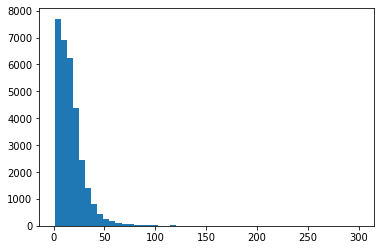

In [95]:
# распреление длины слов в предложении
plt.hist([len(s.split(' ')) for s in all_sents], bins=50)

In [96]:
MAX_LEN = 30

In [97]:
X = torch.zeros((len(all_sents), MAX_LEN), dtype=int)
# готовим матрицу - строка - предложение, столбец - индекс слова в этой позиции
for i in tqdm(range(len(all_sents))):
    for j, w in enumerate(all_sents[i].split(' ')):
        if j >= MAX_LEN:
            break
        X[i, j] = WORD_TO_INDEX.get(w, WORD_TO_INDEX['<miss>'])
        
X = X.to(dev)

100%|██████████| 31148/31148 [00:04<00:00, 6915.45it/s]


In [98]:
X[0:1]

tensor([[ 2933,  1694, 19330, 16240,  9675,  3893, 12478,  2235,  6959,  5049,
          4973,  3605,  2959, 19330, 15448,  8027,     1,     1,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]],
       device='cuda:0')

In [99]:
X.shape

torch.Size([31148, 30])

In [100]:
class Network(torch.nn.Module):

    def __init__(self, dev):
        super(Network, self).__init__()
        self.dev = dev
        self.word_embeddings = torch.nn.Embedding(len(INDEX_TO_WORD), 400).to(self.dev)
        #self.gru = torch.nn.RNN(200, 128, num_layers = 2, nonlinearity = 'relu', batch_first=True).to(self.dev)
        self.gru = torch.nn.GRU(400, 256, num_layers = 2, batch_first=True).to(self.dev)
        self.hidden2tag = torch.nn.Linear(256, len(INDEX_TO_WORD)).to(self.dev)

    def forward(self, sentences):
        embeds = self.word_embeddings(sentences)
        gru_out, state = self.gru(embeds)
        tag_space = self.hidden2tag(gru_out.reshape(-1, 256))
        return tag_space.reshape(sentences.shape[0], sentences.shape[1], -1), state
    
    def forward_state(self, sentences, state):
        embeds = self.word_embeddings(sentences)
        gru_out, state = self.gru(embeds, state)
        tag_space = self.hidden2tag(gru_out.reshape(-1, 256))
        return tag_space.reshape(sentences.shape[0], sentences.shape[1], -1), state

In [101]:
model = Network(dev)
model.forward(X[0:1])[0].shape

torch.Size([1, 30, 20002])

In [102]:
def generate_sentence(line):
    sentence = line.split(' ')
    #sentence = ['к', 'а', 'к', ' ', 'р', 'а', 'н', 'о',' ']
    state = None
    for i in range(MAX_LEN):
        #X = torch.Tensor([[WORD_TO_INDEX[sentence[i]]]]).type(torch.long)
        X = torch.Tensor([[WORD_TO_INDEX.get(sentence[i],WORD_TO_INDEX['<miss>'])]]).type(torch.long)
        #get(w, WORD_TO_INDEX['<miss>']
        X = X.to(dev)
        if i == 0:
            result, state = model.forward(X)
        else:
            result, state = model.forward_state(X, state)
        prediction = result[0, -1, :]
        index_of_prediction = prediction.argmax()
        if i >= len(sentence) - 1:
            if index_of_prediction == 0:
                break
        sentence.append(INDEX_TO_WORD[index_of_prediction])
        
    line = ' '.join(sentence)
    line = re.sub(r'none.*$', '', line)
    print(line)

In [103]:
generate_sentence('проект направлен')

проект направлен омская понимаем открытую потерю уважительно настоящий производстве производстве заведения уровня шаге родителей механизм недоверием недоверием недоверием банковским банковским методическая методическая · одноклассники · прибыльность прибыльность поэтов воспитателям тонкостей интернат продажи


In [133]:
lrate = 0.1

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lrate)
#optimizer = torch.optim.Adam(model.parameters(), lr=lrate)

In [140]:
count = 0

for ep in range(2000):
    
    start = time.time()
    train_loss = 0.
    train_passed = 0
    
    for i in range(int(len(X) / 100)):
        batch = X[i * 100:(i + 1) * 100]
        X_batch = batch[:, :-1]
        Y_batch = batch[:, 1:].flatten()

        optimizer.zero_grad()
        answers, _ = model.forward(X_batch)
        answers = answers.view(-1, len(INDEX_TO_WORD))
        loss = criterion(answers, Y_batch)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        train_passed += 1
    end = time.time()
    
    count += 1
    if count == 1:
        count = 0
        trloss = train_loss / train_passed
        print("Epoch {}. Time: {:.3f}, Train loss: {:.3f}".format(ep, end - start, trloss))
        #generate_sentence('проект позволяет')

Epoch 0. Time: 31.528, Train loss: 0.258
Epoch 1. Time: 32.214, Train loss: 0.258
Epoch 2. Time: 32.602, Train loss: 0.257
Epoch 3. Time: 32.773, Train loss: 0.257
Epoch 4. Time: 32.746, Train loss: 0.257
Epoch 5. Time: 32.729, Train loss: 0.257
Epoch 6. Time: 32.760, Train loss: 0.256
Epoch 7. Time: 32.757, Train loss: 0.257
Epoch 8. Time: 32.747, Train loss: 0.257
Epoch 9. Time: 32.742, Train loss: 0.256
Epoch 10. Time: 32.730, Train loss: 0.256
Epoch 11. Time: 32.740, Train loss: 0.256
Epoch 12. Time: 32.703, Train loss: 0.255
Epoch 13. Time: 32.850, Train loss: 0.255
Epoch 14. Time: 32.795, Train loss: 0.254
Epoch 15. Time: 33.549, Train loss: 0.254
Epoch 16. Time: 32.982, Train loss: 0.253
Epoch 17. Time: 33.034, Train loss: 0.253
Epoch 18. Time: 33.732, Train loss: 0.253
Epoch 19. Time: 33.711, Train loss: 0.252
Epoch 20. Time: 33.710, Train loss: 0.252
Epoch 21. Time: 33.645, Train loss: 0.252
Epoch 22. Time: 33.644, Train loss: 0.253
Epoch 23. Time: 33.666, Train loss: 0.253
Ep

KeyboardInterrupt: 

In [141]:
generate_sentence('предлагается')

предлагается создать серию встреч и семинаров для выпускников вузов на тему карьерного планирования со стороны реального сектора для облегчения дальнейшего трудоустройства выпускникам вузов и уменьшения их рисков <miss> свой карьерный путь


In [142]:
generate_sentence('проект позволяет')

проект позволяет направлен объяснить на характер федеральном и <pad> другие <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [143]:
generate_sentence('в нашей стране дети')

в нашей стране дети рамках стране актуальным не больше во опыт по чем всех чтобы <miss> то возрастов больше себе из <pad> чем например за <pad> сейчас в из <pad> <miss> два них <pad>


In [144]:
generate_sentence('низкий уровень образования')

низкий уровень образования уровень финансово в культуры значительно условиях и ряд национальный выбором разных ее роли карьеры <miss> тьютора общественного в в населения направлении области и жизни и современное новых <miss> <miss> товаров


In [163]:
generate_sentence('преподаватели будут')

преподаватели будут будут повышать свои квалификацию индивидуальные и особенности <miss> <miss> с обслуживание карт в <pad> условиях <pad> становления <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [155]:
descrs[105]


'преподаватели омского государственного университета под руководством константина шестакова совместно о студентами волонтерами выезжают в детские дома города и области и проводят коммуникативные тренинги готовят вместе играют в настольные и спортивные игры.общение отличается от приездов волонтеров из других организаций тем что наши волонтеры приезжают в каждый детский дом регулярно раз в месяц знают детей лично и отслеживают их жизненные ситуации.поэтому была выявлена ситуация когда многие воспитанники детских домой не могут набрать высокий бал егэ открывающих для них возможность получить высшее образование на бюджетной основе.бесплатная учеба единственный шанс для этих детей получить высшее образование.поэтому появилась идея привлечь на безвозмездной основе лучших преподавателей не только из омска и студентов в том числе иностранных для подготовке по английскому для подготовке к егэ детей из детских домой как в режиме он лайн на специально разработанной интернет платформе так в обычно

In [145]:
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, "model_20kw_rnn2l-400-256.pt")

In [117]:
# model = TheModelClass(*args, **kwargs)
# optimizer = TheOptimizerClass(*args, **kwargs)

checkpoint = torch.load("model_20kw_rnn2l-400-256.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
loss = checkpoint['loss']

model.eval()

Network(
  (word_embeddings): Embedding(20002, 400)
  (gru): GRU(400, 256, num_layers=2, batch_first=True)
  (hidden2tag): Linear(in_features=256, out_features=20002, bias=True)
)

In [118]:
model.train()

Network(
  (word_embeddings): Embedding(20002, 400)
  (gru): GRU(400, 256, num_layers=2, batch_first=True)
  (hidden2tag): Linear(in_features=256, out_features=20002, bias=True)
)

In [164]:
c['преподаватели']

84

In [44]:
c['будет']

1283

In [48]:
c.most_common(500)

[('и', 21757),
 ('в', 18684),
 ('на', 7540),
 ('с', 6533),
 ('для', 5371),
 ('по', 4117),
 ('не', 3524),
 ('проекта', 3413),
 ('к', 3142),
 ('как', 2422),
 ('что', 2298),
 ('а', 2041),
 ('детей', 1997),
 ('из', 1893),
 ('о', 1651),
 ('проект', 1626),
 ('это', 1586),
 ('их', 1507),
 ('или', 1477),
 ('от', 1449),
 ('1', 1315),
 ('–', 1285),
 ('будет', 1283),
 ('у', 1203),
 ('образования', 1184),
 ('при', 1184),
 ('2', 1170),
 ('которые', 1116),
 ('за', 1075),
 ('также', 1052),
 ('3', 1010),
 ('развития', 987),
 ('но', 983),
 ('работы', 973),
 ('так', 973),
 ('обучения', 933),
 ('реализации', 926),
 ('жизни', 909),
 ('будут', 877),
 ('россии', 787),
 ('профессии', 767),
 ('может', 764),
 ('создание', 763),
 ('области', 763),
 ('людей', 759),
 ('деятельности', 758),
 ('быть', 735),
 ('только', 709),
 ('т', 708),
 ('то', 705),
 ('рамках', 705),
 ('до', 705),
 ('можно', 704),
 ('школьников', 701),
 ('более', 693),
 ('время', 686),
 ('проведение', 679),
 ('все', 676),
 ('4', 669),
 ('они', 66

In [162]:
# save descrs to disk
import pandas as pd
df = pd.DataFrame(descrs)
df.to_csv("descrs.csv", encoding = 'utf8')
